In [3]:
import pandas as pd
import string
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt


nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/maksim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/maksim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
!pip3 install scikit-learn

In [5]:
def plot_confusion_matrix(conf_matrix, classes,title='Confusion matrix',cmap='RdPu'):
    
    conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]    
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0])
                                  , range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="black")
    plt.tight_layout()
    plt.ylabel('Test data')
    plt.xlabel('Predicted data')

In [6]:
teachers_works_dataset = pd.read_csv('dataset_teachers.csv', sep=';')
teachers_works_dataset.head(5)

,Teacher,Work Name
0,Olena Vovk,The method of big data processing for distance...
1,Olena Vovk,Conference on Computer Science and Information...
2,Olena Vovk,Uncertainty reduction in Big data catalogue fo...
3,Olena Vovk,��������-����������� ������ ��������� ��������...
4,Olena Vovk,Modeling of Parameters of State Participation ...


In [7]:
def remove_non_ascii(text): 
    return ''.join(i for i in text if ord(i)<128)
teachers_works_dataset['Work Name'] = teachers_works_dataset['Work Name'].apply(remove_non_ascii)
teachers_works_dataset

,Teacher,Work Name
0,Olena Vovk,The method of big data processing for distance...
1,Olena Vovk,Conference on Computer Science and Information...
2,Olena Vovk,Uncertainty reduction in Big data catalogue fo...
3,Olena Vovk,"- , 12-20, 2018"
4,Olena Vovk,Modeling of Parameters of State Participation ...
...,...,...
395,Nataliia Melnykova,2018 IEEE 13th International Scientific and Te...
396,Nataliia Melnykova,The special ways of application of neural netw...
397,Nataliia Melnykova,2018 IEEE 13th International Scientific and Te...
398,Nataliia Melnykova,","


In [8]:
y = teachers_works_dataset['Teacher'].to_list()
labels_for_teachers = LabelEncoder()
y = labels_for_teachers.fit_transform(y)

In [10]:
X = teachers_works_dataset['Work Name'].to_list()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

vectorizer=CountVectorizer()
x_vectorizer = vectorizer.fit_transform(X)

vectorized_train=vectorizer.transform(X_train)

vectorized_test=vectorizer.transform(X_test)
import joblib
joblib.dump(vectorizer, "bow_transformer.pkl")

['bow_transformer.pkl']

In [14]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb = mnb.fit(vectorized_train, y_train)

In [15]:
mnb.score(vectorized_test, y_test)

0.3625

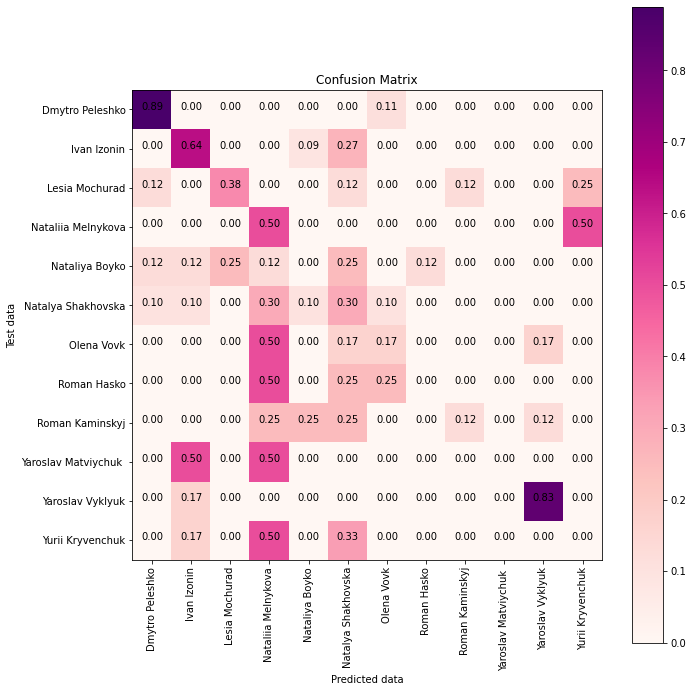

In [17]:
predictions = mnb.predict(vectorized_test)
conf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=[10,10])
plot_confusion_matrix(conf_matrix, classes=teachers_works_dataset['Teacher'].sort_values().unique(),
                      title='Confusion Matrix')

In [22]:
predictions = mnb.predict(vectorized_test)
predictions

array([ 1,  5,  4,  3,  3,  0,  5,  0,  6,  1,  0, 10,  3,  2,  8,  1,  3,
       10, 10,  2,  0,  0,  3,  3,  5,  5,  3,  1,  6,  0,  4,  5,  5,  1,
        3,  8,  0,  6,  5, 10,  0,  0,  3,  3, 11,  5,  3,  5,  6,  5,  0,
        3,  3,  3, 11,  1,  2,  0,  5,  1,  4,  5, 10,  1,  7,  1, 10,  1,
        3, 10,  5,  1,  5, 11,  5,  1,  4,  2,  2,  3])

In [23]:

#just to check
test_df = pd.Series({1: 'Parallel Approach of some Algorithm'})
labels_for_teachers.inverse_transform(
    mnb.predict(vectorizer.transform(test_df))
)


array(['Lesia Mochurad'], dtype='<U20')